## Final Project - Data Cleaning
## Machine Learning Foundations with Python (90-803)

## Group 4

* Yue Sun, Andrew ID: yuesun, GitHub username YueSun98310
* Noah Russo, Andrew ID: nrusso, GitHub username: noahcrusso
* Apurv Singh, Andrew ID: apurvs, GitHub username: apurvsingh98


In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LogisticRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, mean_squared_error, accuracy_score, r2_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from yellowbrick.target import ClassBalance

%matplotlib inline

# Question 1

### What state-level firearm-restrictive laws have the highest effect on preventing homicide? 


### Data Processing for question 1

Dataset1: Loading gun law dataset which has the different legislative gun law restriction for different states in the US

In [272]:
gunlaws = pd.read_csv('gun_laws.csv')
print(gunlaws.head())

     state  year  felony  invcommitment  invoutpatient  danger  \
0  Alabama  1991       0              0              0       0   
1  Alabama  1992       0              0              0       0   
2  Alabama  1993       0              0              0       0   
3  Alabama  1994       0              0              0       0   
4  Alabama  1995       0              0              0       0   

   drugmisdemeanor  alctreatment  alcoholism  relinquishment  ...  \
0                0             0           1               0  ...   
1                0             0           1               0  ...   
2                0             0           1               0  ...   
3                0             0           1               0  ...   
4                0             0           1               0  ...   

   expartedating  dvrosurrender  dvrosurrendernoconditions  \
0              0              0                          0   
1              0              0                          0   
2 

Dataset2: CDC Data to get the average gun related death rate for the population of each states

In [273]:
#Loading the csv
gun_violence = pd.read_csv("CDC.csv")
gun_violence = gun_violence[:51]
print(gun_violence.head())

#getting the relevant columns
gun_violence = gun_violence[['State Name','Population','Deaths']]


      State Name  State FIPS  Population Deaths Crude Rate Age Adjusted Rate  \
0  West Virginia        54.0   1784787.0     87       4.88              5.54   
1        Florida        12.0  21733312.0   1227       5.65              6.32   
2       Illinois        17.0  12587530.0   1167       9.27              9.67   
3      Minnesota        27.0   5657342.0    138       2.44              2.53   
4       Maryland        24.0   6055802.0    526       8.69              9.21   

    YPLL YPLL Crude Rate  YPLL Age-Adjusted Rate YPLL Calculated Year  \
0   2424          171.77                  188.12   YPLL before age 65   
1  39866          233.20                  243.82   YPLL before age 65   
2  40264          383.53                  384.03   YPLL before age 65   
3   4572           97.10                   98.71   YPLL before age 65   
4  17795          351.09                  362.97   YPLL before age 65   

                                      appliedFilters  
0  Homicide Firearm Death

## Feature Engineering

Fixing Inconsistent data 

In [274]:
#Checking for inconsistent values
print(gun_violence['Deaths'])

#Fixing the values that have characters
gun_violence.loc[7, 'Deaths'] = 0
gun_violence.loc[9, 'Deaths'] = 0
gun_violence.loc[30, 'Deaths'] = 18
gun_violence.loc[31, 'Deaths'] = 16
gun_violence.loc[32, 'Deaths'] = 17
gun_violence.loc[34, 'Deaths'] = 15


0       87
1     1227
2     1167
3      138
4      526
5       22
6       26
7       --
8      744
9       --
10     101
11      76
12     149
13    1732
14     253
15     253
16     109
17      49
18     788
19     211
20     747
21     899
22     564
23      75
24     824
25    1734
26     235
27     528
28     269
29     652
30    18**
31    16**
32    17**
33     341
34    15**
35     561
36     148
37      27
38     672
39     282
40     499
41     683
42      33
43     160
44     496
45      26
46     130
47     440
48     157
49      83
50     382
Name: Deaths, dtype: object


Creating a feature of population percentage of death related to gun violence for each state in a new column "Gun deaths"

In [275]:
gun_violence['Deaths'] = gun_violence['Deaths'].astype(int)
gun_violence['Population'] = gun_violence['Population'].astype(int)
gun_violence['Gun deaths'] = gun_violence['Deaths']/gun_violence['Population']*100

Merging both dataframes on 'State Name' and 'state'

In [276]:
q1 = pd.merge(gun_violence, gunlaws, left_on='State Name', right_on='state')

Min Max scaling the 'Gun deaths' to make the metric comparable between the states with different population

In [277]:
scaler = MinMaxScaler()

# selecting column
gun_deaths = q1[['Gun deaths']]

# fit and transform the data
scaled_gun_deaths = scaler.fit_transform(gun_deaths)

# replacing'Gun deaths' with the scaled values
q1['Gun deaths'] = scaled_gun_deaths


Plot to visualize the rate of gun deaths across states

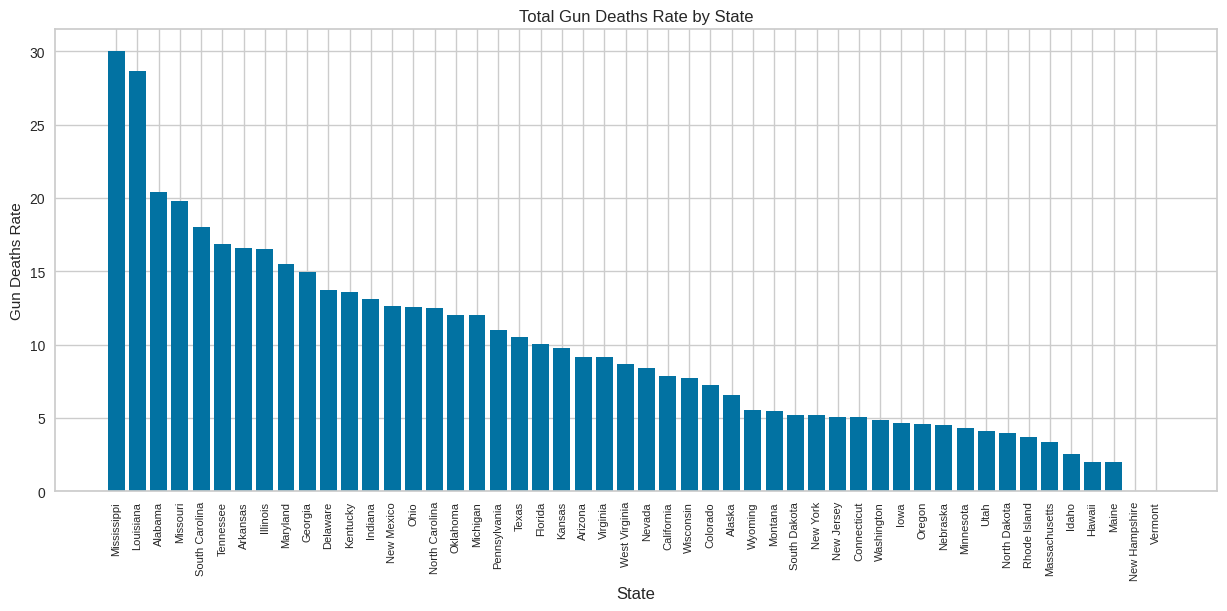

In [278]:
sorted = q1.groupby('State Name')['Gun deaths'].sum().reset_index()

# sorting the gun deaths by state
sorted = sorted.sort_values(by='Gun deaths', ascending=False)
plt.figure(figsize=(15, 6))

# bar plot
plt.bar(sorted['State Name'], sorted['Gun deaths'])


plt.xlabel('State', fontsize=12)
plt.ylabel('Gun Deaths Rate')
plt.title('Total Gun Deaths Rate by State')

# Rotating the x-values
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()


#### From the graph we can tell that Mississippi has the highest gun related deaths in the US.

Change the values in the 'year' column of q1 to dummy variables

In [279]:
year_dummies = pd.get_dummies(q1['year'], prefix='year')
# state_dummies = pd.get_dummies(merged_df['state'], prefix='state')

# # concatenate the dummy variables with the original merged_df
q1 = pd.concat([q1, year_dummies], axis=1)
q1 = q1.drop(['State Name','year', 'state'], axis=1)

Check on the duplicates in q1

In [280]:
print(q1.duplicated().value_counts())

False    1500
dtype: int64


Separate the dataset into X and y, where the target variable will be the Gun death. Then split the X and y into training and testing datasets with a 80-20 ratio, and a random state of 42. Build a Ridge model, fit the training dataset and print out the R2 score and the mse.

Test train split

In [281]:
X = q1.drop('Gun deaths', axis=1)
y = q1['Gun deaths']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Selection

#### Model 1. Ridge Regression

In [282]:
# Defining the model
ridge = Ridge()

# Fitting the model
ridge.fit(X_train, y_train)


# Evaluating the model using R2 score and MSE
print("For Ridge")
print()
print("Training R-squared:", ridge.score(X_train,y_train))
print("Testing R-squared:", ridge.score(X_test,y_test))
mse_train = mean_squared_error(y_train,ridge.predict(X_train))
mse_test = mean_squared_error(y_test,ridge.predict(X_test))
print("MSE train:", mse_train)
print("MSE test:", mse_test)

For Ridge

Training R-squared: 0.9522981981945836
Testing R-squared: 0.9432063545724512
MSE train: 0.0022149678306054425
MSE test: 0.002837546415545954


A R2 score of 0.94320635 and a mean squared error of 0.00283755 means that our Ridge model performs pretty good.

#### Model 2. Lasso Regression

In [283]:
# Defining the model
model_lasso = Lasso()

# Fitting the model
model_lasso.fit(X_train, y_train)


# Evaluating the model using R2 score and MSE
print("For Lasso")
print()
print("Training R-squared:", model_lasso.score(X_train,y_train))
print("Testing R-squared:", model_lasso.score(X_test,y_test))
mse_train = mean_squared_error(y_train,model_lasso.predict(X_train))
mse_test = mean_squared_error(y_test,model_lasso.predict(X_test))
print("MSE train:", mse_train)
print("MSE test:", mse_test)

For Lasso

Training R-squared: 0.6781584489423811
Testing R-squared: 0.6925490577793256
MSE train: 0.014944271603255063
MSE test: 0.015360984710295119


The Lasso model performs worse than the Ridge model.

#### Model 3. ElasticNet

In [284]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)

# Evaluating the model using R2 score and MSE
print("For ElasticNet")
print()
print("Training R-squared:", elastic.score(X_train,y_train))
print("Testing R-squared:", elastic.score(X_test,y_test))
mse_train = mean_squared_error(y_train,elastic.predict(X_train))
mse_test = mean_squared_error(y_test,elastic.predict(X_test))
print("MSE train:", mse_train)
print("MSE test:", mse_test)

For ElasticNet

Training R-squared: 0.6786112736296177
Testing R-squared: 0.6928328618387951
MSE train: 0.014923245309128384
MSE test: 0.0153468051804269


ElasticNet is poor too

#### Model 4. Linear Regression

In [285]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model using R2 score and MSE
print("For Linear Regression")
print()
print("Training R-squared:", model.score(X_train,y_train))
print("Testing R-squared:", model.score(X_test,y_test))
mse_train = mean_squared_error(y_train,model.predict(X_train))
mse_test = mean_squared_error(y_test,model.predict(X_test))
print("MSE train:", mse_train)
print("MSE test:", mse_test)

For Linear Regression

Training R-squared: 0.9570227076052755
Testing R-squared: 0.9353640332573007
MSE train: 0.001995591707188507
MSE test: 0.003229367552749634


### We see that Linear Regression performs the best among all the 4 models we have trained with the highest R-squared value so we are going to choose that for our inference.


Print out the top five features that have the most positive coefficients and the top five features that have the most negative coefficients.

In [286]:
coef = pd.DataFrame({'feature': list(X.columns), 'coef': model.coef_})

# print top 5 coefficients
top_positive_coef = coef.sort_values('coef', ascending=False).head(5)
print(top_positive_coef)
print()
top_negative_coef = coef.sort_values('coef', ascending=True).head(5)
print(top_negative_coef)

            feature      coef
19        reportall  0.302555
70         magazine  0.273916
68  assaultregister  0.273909
36    registrationh  0.267534
38      defactoregh  0.248420

              feature      coef
113  preemptionnarrow -0.267578
20         reportallh -0.264842
55    universalpermit -0.255371
35       registration -0.252757
11           violenth -0.233533


Plot those variables with coefficients on a barchart

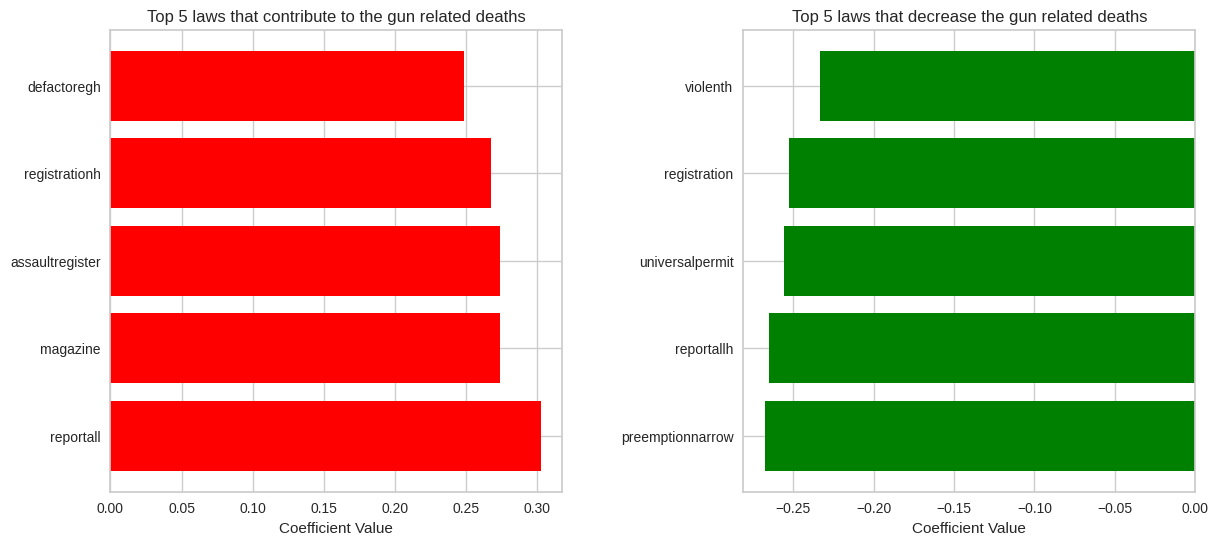

In [287]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# first plot 
ax[0].barh(top_positive_coef['feature'], top_positive_coef['coef'],color='red')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_title('Top 5 laws that contribute to the gun related deaths')

# second plot 
ax[1].barh(top_negative_coef['feature'], top_negative_coef['coef'],color='green')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_title('Top 5 laws that decrease the gun related deaths')

# spacing between plots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

### Q1 : What state level firearm-restrictive laws have the highest effect on preventing homicide? 

### Answer: Following restrictive laws have the highest positive correlation to the gun related deaths


*   defactoregh - De facto registration of handguns is in place because of a recordkeeping requirement for all handgun sales
*   registrationh - Gun owners must register their handguns with the state
*   assaultregister - Grandfathered weapons must be registered
*   magazine - Ban on sale large capacity magazines beyond just ammunition for pistols
*   reportall - All private sellers and licensced dealers are required to report all fireamrs sales record to the states

###Following restrictive laws have the highest negative correlation to the gun related deaths

*   violenth - Handgun possession is prohibited for people who have committed a violent misdemeanor 
*   registration - gunowners must register their firearms with the state 
*   universalpermit - background checks conducted through permit requirement for all firearm sells
*   reportallh - All private sellers and licensed dealers are required to report handguns sales record to the state
*   preemptionnarrow - Any state law that preempts local regulation of firearms is narrow in its scope (i.e., in one area of regulation)






# Question 2

## Based on the severity of the attack, can we predict which type of gun is most likely to be used in a school shooting?


### Data Loading for Q2

Dataset3: School Shooting Incidence Information

Dataset4: School Shooting Weapon Information

In [288]:
#Loading datasets

school_shooting = pd.read_csv('New_School_Shooting.csv')
school_shooting_weapons = pd.read_csv('School_Shooting_Weapon_Info.csv')

Merging both datasets to get capture the information of guns used in the shootings

In [289]:
school_shooting = pd.merge(school_shooting, school_shooting_weapons, on='Incident_ID')
print(school_shooting.shape)

(2266, 45)


## Feature Engineering for Q2

In [290]:

print('All Columns before choosing relevant features')

print(school_shooting.dtypes)

#Picking out relevant features
relevant_columns = ['Number_Victims','School_Level','Targets','Bullied','Domestic_Violence','Gang_Related','Weapon_Type']
school_shooting = school_shooting[relevant_columns]
print()
print('Columns after choosing relevant features')
print(school_shooting.dtypes)

All Columns before choosing relevant features
Incident_ID              object
Month                   float64
Day                     float64
Year                    float64
Date                     object
School                   object
Victims_Killed          float64
Victims_Wounded         float64
Number_Victims          float64
Shooter_Killed          float64
Source                   object
Number_News             float64
Media_Attention          object
Reliability             float64
Quarter                  object
City                     object
State                    object
School_Level             object
Location                 object
Location_Type            object
During_School            object
Time_Period              object
First_Shot               object
Duration_min            float64
Summary                  object
Narrative                object
Situation                object
Targets                  object
Accomplice               object
Accomplice_Narrative     o

The following features were selected as relevant features to build a classification model to predict the type of gun used by a school shooter.


*   Year
*   State
*   Number_Victims: the severity and impact of a shooting may vary depending on the number of victims; the number of victims may be correlated with the type of gun used
*   School_Level: this can provide context for the shooting and may impact the types of guns used
*   Targets: this can provide information about the motive behind the shooting and may impact the types of guns used
*   Bullied: (Bullied by the victim(s) and did not indiscriminately target random students) this can provide information about the motive behind the shooting and may impact the types of guns used
*   Domestic_Violence: this can provide information about the motive behind the shooting and may impact the types of guns used
*   Gang_Related: this can provide information about the motive behind the shooting and may impact the types of guns used
*   Weapon_Type: the type of gun used in the shooting is likely to be one of the most important features for predicting the type of gun used in future shootings












Data Processing

1. Changing categorizing different types of guns in Small, long and Multiple Guns. 

2. Then imputing the Unknown, Other and "No Data" with the mode value of guns. 

In [291]:
print(school_shooting['Weapon_Type'].value_counts())

school_shooting['Weapon_Type'] = school_shooting['Weapon_Type'].replace({
    'Handgun': 'Small Gun',
    'Rifle': 'Big Gun',
    'Shotgun': 'Big Gun',
    'Multiple Handguns': 'Big Gun',
    'Multiple Unknown': 'Big Gun',
    'Multiple Rifles': 'Big Gun'
})

#Changing values to NaN so that we can use the fillNa
school_shooting['Weapon_Type'].replace(['No Data', 'Unknown','Other'], np.nan, inplace=True) 

#impute values with mode
school_shooting['Weapon_Type'].fillna(school_shooting['Weapon_Type'].mode()[0] , inplace=True)

print()
print(school_shooting['Weapon_Type'].value_counts())

Handgun              1534
No Data               230
Rifle                 115
Other                 110
Shotgun                67
Multiple Handguns      46
Multiple Unknown       27
Unknown                24
Multiple Rifles         7
Name: Weapon_Type, dtype: int64

Small Gun    2004
Big Gun       262
Name: Weapon_Type, dtype: int64


#### Data Imputation

In [292]:
print(school_shooting.isnull().sum())

Number_Victims         0
School_Level          23
Targets              346
Bullied              344
Domestic_Violence    163
Gang_Related         544
Weapon_Type            0
dtype: int64


### In this section, we are:

* Imputing missing values for each features with mode. We are choosing mode because the features are categorical so the most frequently occuring value would be suitable for filling missing values

* Making the values uniform. We converted values like N, NO to No

In [293]:
school_shooting['School_Level'].replace(['Unknown'], np.nan, inplace=True) 
school_shooting['School_Level'].fillna(school_shooting['School_Level'].mode()[0] , inplace=True)

school_shooting['Targets'].fillna(school_shooting['Targets'].mode()[0] , inplace=True)

school_shooting['Bullied'] = school_shooting['Bullied'].replace({'N': 'No'})
school_shooting['Bullied'].fillna(school_shooting['Bullied'].mode()[0] , inplace=True)

school_shooting['Domestic_Violence'] = school_shooting['Domestic_Violence'].replace({'NO': 'No'})
school_shooting['Domestic_Violence'].fillna(school_shooting['Domestic_Violence'].mode()[0] , inplace=True)

school_shooting['Gang_Related'].fillna(school_shooting['Gang_Related'].mode()[0] , inplace=True)


In [294]:
print(school_shooting['School_Level'].value_counts())
print()
print(school_shooting['Targets'].value_counts())
print()
print(school_shooting['Bullied'].value_counts())
print()
print(school_shooting['Domestic_Violence'].value_counts())
print()
print(school_shooting['Gang_Related'].value_counts())
print()
print(school_shooting.isnull().sum())

High           1459
Elementary      400
Middle          222
Junior High      67
Other            37
K-8              34
K-12             29
6-12             18
Name: School_Level, dtype: int64

Victims Targeted    1449
Random Shooting      324
Both                 267
Neither              226
Name: Targets, dtype: int64

No     2169
Yes      97
Name: Bullied, dtype: int64

No     2143
Yes     123
Name: Domestic_Violence, dtype: int64

No     2026
Yes     240
Name: Gang_Related, dtype: int64

Number_Victims       0
School_Level         0
Targets              0
Bullied              0
Domestic_Violence    0
Gang_Related         0
Weapon_Type          0
dtype: int64


### Here, we are recategorizing the features School_Level where we changed:
 
*    'High': 'High',
*    'Elementary': 'Elementary',
*    'Middle': 'Middle',
*    'Junior High': 'Middle',
*    'Other': np.nan,
*    'K-8': 'Elementary',
*    'K-12': 'High',
*    '6-12': 'High'

Doing this improved the precision of our minority class

In [295]:
#Recategoriziing the school 

school_shooting['School_Level'] = school_shooting['School_Level'].replace({
    'High': 'High',
    'Elementary': 'Elementary',
    'Middle': 'Middle',
    'Junior High': 'Middle',
    'Other': np.nan,
    'K-8': 'Elementary',
    'K-12': 'High',
    '6-12': 'High'
})
mode = school_shooting['School_Level'].mode()[0]
school_shooting['School_Level'] = school_shooting['School_Level'].fillna(mode)

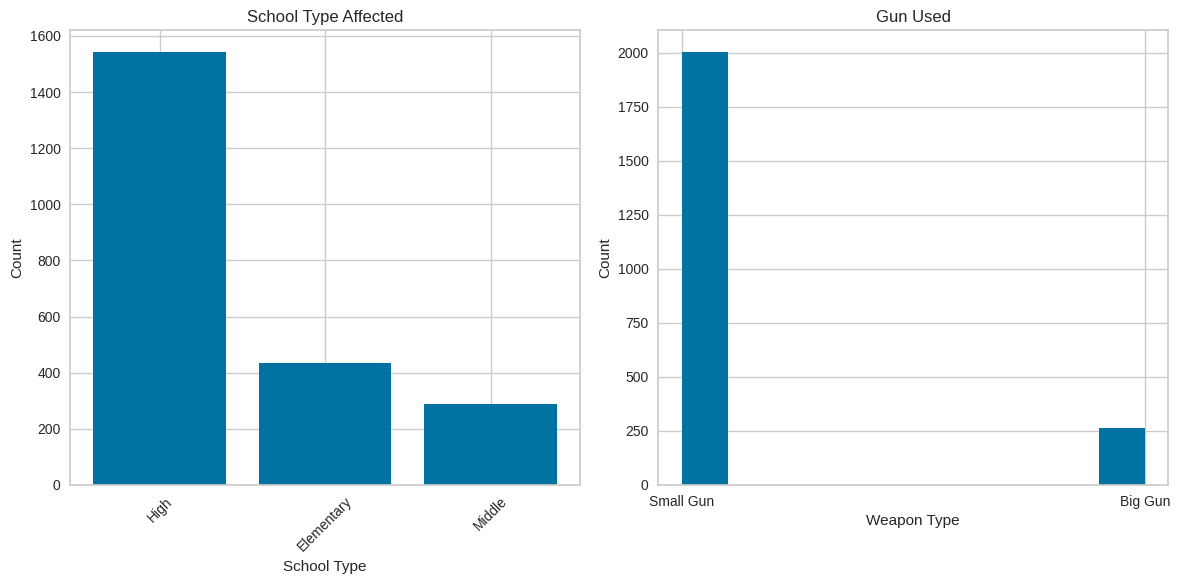

In [296]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
axs[0].bar(school_shooting['School_Level'].value_counts().index, school_shooting['School_Level'].value_counts().values)
axs[0].set_title('School Type Affected')
axs[0].set_xlabel('School Type')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', labelrotation=45, labelsize=10)

# Second subplot 
axs[1].hist(school_shooting['Weapon_Type'], bins=10)
axs[1].set_title('Gun Used')
axs[1].set_xlabel('Weapon Type')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


The graphs shows that High School is affected the most and smaller guns are used the most. There is an imbalance in the target class of weapon type that we will work on

### Encoding our categorical data 

Making our target variable numberical to avoid it getting Encoded

In [297]:
school_shooting['Weapon_Type'] = school_shooting['Weapon_Type'].replace({
    'Small Gun': 0,
    'Big Gun': 1
})

In [298]:
school_shooting = pd.get_dummies(school_shooting, drop_first = True)
school_shooting.head()


,Number_Victims,Weapon_Type,School_Level_High,School_Level_Middle,Targets_Neither,Targets_Random Shooting,Targets_Victims Targeted,Bullied_Yes,Domestic_Violence_Yes,Gang_Related_Yes
0,1.0,0,0,0,0,0,1,0,0,0
1,3.0,0,1,0,0,0,0,0,0,0
2,0.0,0,1,0,0,0,1,0,0,0
3,1.0,0,1,0,0,0,1,0,0,0
4,0.0,0,0,1,0,0,1,0,0,0


### Standard scaling Number of Victims because the value variation is high, scaling it made the performance better

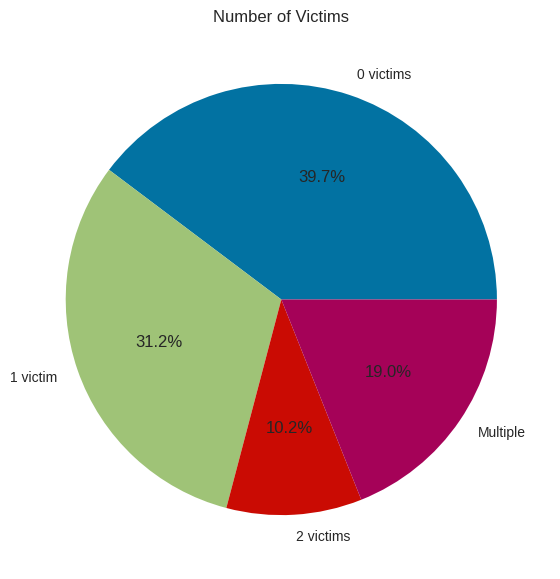

In [299]:
#Creating the dataframe for pie chart
values = school_shooting['Number_Victims'].value_counts()
top = values[:2]
other = values[2:].sum()
plot_data = top.append(pd.Series([other]))

# labels
labels = ["0 victims", "1 victim", "2 victims",  "Multiple"]

# Plot 
fig = plt.figure(figsize=(10, 7))
plt.pie(plot_data, labels=labels, autopct="%1.1f%%")
plt.title("Number of Victims")
plt.show()

We see that there are lots variation in the number of victims

There are differences between the column with real values as seen from the above visualizations, and it would be a good idea to scale them before doing any modeling. Applying standard scaler

In [300]:
scaler = StandardScaler()
school_shooting['Number_Victims'] = scaler.fit(school_shooting['Number_Victims'].array.reshape(-1, 1)).transform(school_shooting['Number_Victims'].array.reshape(-1, 1))
school_shooting.tail()

,Number_Victims,Weapon_Type,School_Level_High,School_Level_Middle,Targets_Neither,Targets_Random Shooting,Targets_Victims Targeted,Bullied_Yes,Domestic_Violence_Yes,Gang_Related_Yes
2261,0.207773,0,1,0,1,0,0,0,0,0
2262,-0.113821,0,1,0,0,0,1,0,0,0
2263,-0.435414,0,1,0,0,0,1,0,0,0
2264,-0.113821,0,0,1,0,1,0,0,0,0
2265,-0.113821,0,1,0,0,1,0,0,0,0


Train test split

In [301]:
y = school_shooting["Weapon_Type"]
X = school_shooting.drop('Weapon_Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=22)

## Model Training and Selection

#### Model 1. KNN

In [302]:
# Defining parameter for the gridsearch

knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}


#GridSearch
knn = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='recall', cv=5)
       
#Fitting the model
knn.fit(X_train, y_train)

# Choosing the best model
best_knn = knn.best_estimator_

# Testing the best model
knn_pred = best_knn.predict(X_test)
print("KNN classification report:")
print(classification_report(y_test, knn_pred, target_names=['Small Guns', 'Big Guns']))

KNN classification report:
              precision    recall  f1-score   support

  Small Guns       0.89      0.98      0.94       502
    Big Guns       0.41      0.11      0.17        65

    accuracy                           0.88       567
   macro avg       0.65      0.54      0.55       567
weighted avg       0.84      0.88      0.85       567



#### Model 2. Logistic Regression

In [303]:
# Defining parameter for the gridseach

logistic_params = {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                   'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}



#GridSearch
logistic = GridSearchCV(LogisticRegression(), logistic_params, scoring='f1', cv=5)
       
#Fitting the model
logistic.fit(X_train, y_train)

# Choosing the best model
best_logistic = logistic.best_estimator_

# Testing the best model
logistic_pred = best_logistic.predict(X_test)
print("Logistic Regression classification report:")
print(classification_report(y_test, logistic_pred, target_names=['Small Guns', 'Big Guns']))

Logistic Regression classification report:
              precision    recall  f1-score   support

  Small Guns       0.89      1.00      0.94       502
    Big Guns       0.67      0.06      0.11        65

    accuracy                           0.89       567
   macro avg       0.78      0.53      0.53       567
weighted avg       0.87      0.89      0.85       567



#### Model 3. Decision Tree

In [304]:
# Defining parameter for the gridseach

decision_tree_params = {'max_depth': [3, 5, 7],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4]}

#GridSearch
decision_tree = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, scoring='recall', cv=5)
       
#Fitting the model
decision_tree.fit(X_train, y_train)

# Choosing the best model
best_decision_tree = decision_tree.best_estimator_

# Testing the best model
decision_tree_pred = best_decision_tree.predict(X_test)
print("Decision Tree classification report:")
print(classification_report(y_test, decision_tree_pred, target_names=['Small Guns', 'Big Guns']))

Decision Tree classification report:
              precision    recall  f1-score   support

  Small Guns       0.89      0.98      0.94       502
    Big Guns       0.44      0.11      0.17        65

    accuracy                           0.88       567
   macro avg       0.67      0.54      0.55       567
weighted avg       0.84      0.88      0.85       567



#### Model 4. AdaBoost

In [305]:
# Defining parameter for the gridseach

ada_boost_params = {'n_estimators': [50, 100, 200],
                    'learning_rate': [0.1, 0.5, 1.0]}



#GridSearch
ada_boost = GridSearchCV(AdaBoostClassifier(), ada_boost_params, scoring='recall', cv=5)
       
#Fitting the model
ada_boost.fit(X_train, y_train)

# Choosing the best model
best_ada_boost = ada_boost.best_estimator_

# Testing the best model
ada_boost_pred = best_ada_boost.predict(X_test)
print("AdaBoost classification report:")
print(classification_report(y_test, ada_boost_pred, target_names=['Small Guns', 'Big Guns']))


AdaBoost classification report:
              precision    recall  f1-score   support

  Small Guns       0.90      0.99      0.94       502
    Big Guns       0.71      0.15      0.25        65

    accuracy                           0.90       567
   macro avg       0.81      0.57      0.60       567
weighted avg       0.88      0.90      0.86       567



### Model Selecting

* After running Hyperparameter tuning through GridSearch and trying out Ensemble model (AdaBoost), we are choosing AdaBoost as our best model because its precision and then recall for the minority class is the best.

* We are having low recall for all the models and could not get it higher even after all the feature engineering. Our Feature Engineering significantly increased our precision for the minority class.

* We have added recall as the scoring parameter for all the models in GridSearch to relatively get the best recall value.

* We prioritised Precision over Recall when we could not increase both because we are tying to capture the dangers of big guns and having a higher class precision is key for that. The recall is low a it is having high False negative for that class which means the boundary between the data distribution for both classes are not distinct in the dataset.

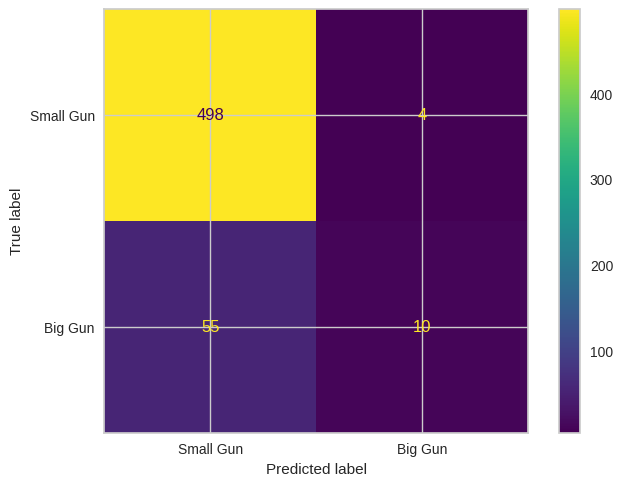

In [306]:
cm_AdaBoost = confusion_matrix(y_test,ada_boost_pred)
display_cm= ConfusionMatrixDisplay(confusion_matrix=cm_AdaBoost,
                                       display_labels=["Small Gun","Big Gun"])
display_cm.plot();

### Using feature importance to infer the factors that result in the classification as Big Guns

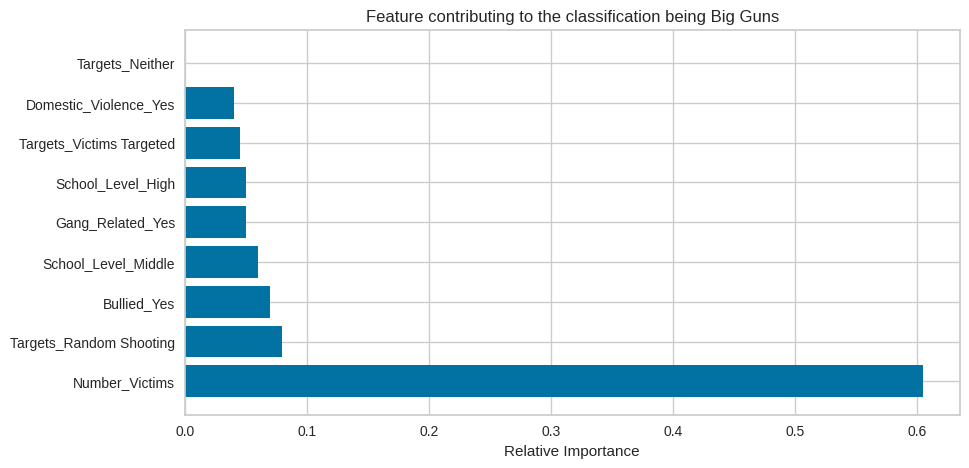

In [307]:
# Getting the feature importance and sorting it in descending order
importances = best_ada_boost.feature_importances_
indices = np.argsort(importances)[::-1]

#bar plot
plt.figure(figsize=(10, 5))
plt.title("Feature contributing to the classification being Big Guns")
plt.barh(range(len(indices)), importances[indices], align="center")
feature_names = list(X_train.columns)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Question 3

### Data Processing for Q3

### Can we predict the type of weapons dealers based on violations, the content of the inspection letter, and whether or not they were recommended to lose their license?

Reading and cleaning missing pieces data and inspection reports on gun dealer violations. They will remain separate for now, until we begin preparing our model, at which point we will know how they can operate together, if at all.

Beginning with the gun dealer violations dataset. Broadly, this data set is a collection of inspection reports that resulted in documented violations of procedure across the US over a recent time period

In [308]:
violations = pd.read_csv('atf_inspection_reports_data.csv')

In [309]:
violations.shape

(1925, 17)

This data has 1925 rows and 17 columns

In [310]:
violations.head()

,ui_number,ffl_number,ffl_type,ffl_proprietor,ffl_proprietor_2,ffl_address,ffl_city,ffl_state,ffl_zip,ffl_county,inspection_assign_date,inspection_complete_date,revocation_effective_date,final_disposition,revocation_warranted,violations,report_url
0,763050-2015-0402-B1B,1-56-059-01-6F-21093,Dealer,"Milholen, Charles E. III",NaN,186 Valley Oaks Drive,Advance,NC,27006.0,Davie,2015-09-15,2015-12-01,NaN,Warning letter,N,"478.21(a), 478.102(a), 478.103(a)",https://atf-inspection-reports.s3.amazonaws.co...
1,773015-2016-0537-B1B,4-31-025-01-8M-00941,Dealer,Roy Lynn Eicher,Hunters Den Of Ohio,1299C Ohio Pike,Amelia,OH,45102.0,Clermont,2016-06-09,2016-07-18,NaN,Warning letter,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4...",https://atf-inspection-reports.s3.amazonaws.co...
2,764035-2016-0098-B1B,1-59-025-01-7K-31613,Dealer,"Venegas Ventures, LLC",The Gun Stash,12043 SW 117th CT.,Miami,FL,33186.0,Miami-dade,2016-01-27,2016-07-15,NaN,Warning letter,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4...",https://atf-inspection-reports.s3.amazonaws.co...
3,782110-2016-0329-B1B,5-74-123-02-7K-00925,Pawnbroker,"Brasher, Jerry Lee",NaN,602 US Hwy 77a S,Yoakum,TX,77995.0,Dewitt,2016-05-25,2016-07-05,NaN,Warning letter,N,"478.21(a), 478.102(a), 478.124(a), 478.124(c)(...",https://atf-inspection-reports.s3.amazonaws.co...
4,760560-2016-0089-B1B,1-58-055-02-5B-07652,Pawnbroker,"Herb's Trading Company, LLC",Herb's Trading Company,12334 Highway 27,Summerville,GA,30747.0,Chattooga,2015-11-18,2016-11-08,NaN,Warning letter,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(i), 47...",https://atf-inspection-reports.s3.amazonaws.co...


A brief look tells us this is mostly record keeping information, but some categorical variables of interest could be the state, final disposition, revocation warranted or not, and especially the violations in question. 

In [311]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ui_number                  1925 non-null   object 
 1   ffl_number                 1924 non-null   object 
 2   ffl_type                   1924 non-null   object 
 3   ffl_proprietor             1924 non-null   object 
 4   ffl_proprietor_2           1201 non-null   object 
 5   ffl_address                1924 non-null   object 
 6   ffl_city                   1924 non-null   object 
 7   ffl_state                  1924 non-null   object 
 8   ffl_zip                    1924 non-null   float64
 9   ffl_county                 1924 non-null   object 
 10  inspection_assign_date     1924 non-null   object 
 11  inspection_complete_date   1919 non-null   object 
 12  revocation_effective_date  37 non-null     object 
 13  final_disposition          1924 non-null   objec

The following variables are our relevant features that we are choosing:



*   ffl_type - Dealer type
*   ffl_state - State
*   final_disposition - Result of the inspection 
*   inspection_complete_date - Date
*   revocation_warranted - Whether or not the licensed are revoked 
*   violations - The legal code of violation





In [312]:
violations = violations[['ffl_type', 'ffl_state', 'final_disposition', 'inspection_complete_date', 'revocation_warranted', 'violations']]
violations.head(5)

,ffl_type,ffl_state,final_disposition,inspection_complete_date,revocation_warranted,violations
0,Dealer,NC,Warning letter,2015-12-01,N,"478.21(a), 478.102(a), 478.103(a)"
1,Dealer,OH,Warning letter,2016-07-18,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4..."
2,Dealer,FL,Warning letter,2016-07-15,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4..."
3,Pawnbroker,TX,Warning letter,2016-07-05,N,"478.21(a), 478.102(a), 478.124(a), 478.124(c)(..."
4,Pawnbroker,GA,Warning letter,2016-11-08,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(i), 47..."


Now we are sorting out the least relevant columns for our data here. We are taking only dealer type, state, final disposition, revocation warranted, and violations as well as inspection complete date. We are only taking date for purposes of further data exploration, but it will not factor into our model with this data. 

We are still missing some data here, so we will drop all na's. it should not adversely affect our data much as we are only losing 6 rows in total. 

In [313]:
violations = violations.dropna()

Our potential candidate version of this data set has 1919 rows and 5 columns

Inspecting this variable, because it will be of interest in relation to our target variable. We may need to split this into dummy variables. 

In [314]:
print(violations['violations'].value_counts())

478.125(e)                                                                                                                                                                    91
478.126a                                                                                                                                                                      74
478.125(e), 478.126a                                                                                                                                                          24
478.102(a)                                                                                                                                                                    16
478.21(a), 478.124(c)(1), 478.124(c)(3)(i), 478.124(c)(3)(iv), 478.124(c)(4), 478.124(c)(5), 478.125(e)                                                                       11
                                                                                                                   

We are going to see if there is any value in sorting through these violations for use in our classifications models

now that we have an understanding of this column, we are going to fix it on our dataframe

We are also creating totals of the raw number of violations to see if that has any impact on our predictions as well. 

In [315]:
total_violations = []

for i in violations['violations']:
  total = len(i.split(','))
  total_violations.append(total)

In [316]:
print(len(total_violations))
#first 20 values
total_violations[:20]

1918


[3, 6, 6, 8, 9, 6, 1, 8, 6, 4, 7, 7, 7, 1, 2, 2, 1, 6, 1, 9]

appending this to our original violation data set

In [317]:
violations['totals'] = total_violations

let's recode the final disposition letters and revocation warranted variables, which will also go into our classification.

In [318]:
print(violations['final_disposition'].value_counts())

Warning letter                  1769
Warning conference                83
Revocation/denial of renewal      55
Settlement                         6
Surrendered/out of business        5
Name: final_disposition, dtype: int64


In [319]:
violations = pd.concat([violations, pd.get_dummies(violations['final_disposition'])], axis=1)


and for 'revocation warranted'

In [320]:
print(violations['revocation_warranted'].value_counts())

N    1781
Y     137
Name: revocation_warranted, dtype: int64


In [321]:
violations = pd.concat([violations, pd.get_dummies(violations['revocation_warranted'])], axis=1)


This data set will be used for our Q3 classification model

Finally, we will use LabelEncoder to recode our target variable, because it has many categories

In [322]:
print(violations['ffl_type'].value_counts())

Dealer          1041
Manufacturer     460
Pawnbroker       394
Importer          23
Name: ffl_type, dtype: int64


We are going to recode the ffl_type 'importer' and 'pawnbroker' to dealer due to the massive class imbalance in our target variable. Then we will recode our variable. In the context of the question, it makes sense to classify both importers and pawnbrokers as dealers and not manufacturers because they deal at a point of sale with a complete product and are likely to experience different inspections than manufacturers. 

In [323]:
violations['ffl_type'] = violations['ffl_type'].replace({
   'Importer': 'Dealer'})
violations['ffl_type'] = violations['ffl_type'].replace({
   'Pawnbroker': 'Dealer'})

In [324]:
enc = LabelEncoder()
newenc = enc.fit_transform(violations['ffl_type'].ravel())
target_codes = pd.DataFrame(newenc)


Appending to our original data set

In [325]:
violations['target_codes'] = target_codes

----------------------------------------------------------

#### Final note: we are retaining a few variables we know are likely to be unnecessary in each of our data sets, such as state and year, to remind us of the general area and period for which our data exists. These will be removed when we prepare to fit our models and test them. 

## Feature Engineering

In [326]:
# Scaling down continuous variable of totals
scaler = StandardScaler()
violations['totals'] = scaler.fit(violations['totals'].array.reshape(-1, 1)).transform(violations['totals'].array.reshape(-1, 1))
violations.head()


,ffl_type,ffl_state,final_disposition,inspection_complete_date,revocation_warranted,violations,totals,Revocation/denial of renewal,Settlement,Surrendered/out of business,Warning conference,Warning letter,N,Y,target_codes
0,Dealer,NC,Warning letter,2015-12-01,N,"478.21(a), 478.102(a), 478.103(a)",-0.636008,0,0,0,0,1,1,0,0.0
1,Dealer,OH,Warning letter,2016-07-18,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4...",0.349873,0,0,0,0,1,1,0,0.0
2,Dealer,FL,Warning letter,2016-07-15,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(iv), 4...",0.349873,0,0,0,0,1,1,0,0.0
3,Dealer,TX,Warning letter,2016-07-05,N,"478.21(a), 478.102(a), 478.124(a), 478.124(c)(...",1.007126,0,0,0,0,1,1,0,0.0
4,Dealer,GA,Warning letter,2016-11-08,N,"478.21(a), 478.124(c)(1), 478.124(c)(3)(i), 47...",1.335753,0,0,0,0,1,1,0,0.0


We drop NA values rather than impute them because there are only 6 and they are target codes, not other features 

In [327]:
violations = violations.dropna()

In [328]:
# splitting into training and testing
# features i am removing because they are less important "Revocation/denial of renewal","Surrendered/out of business",
y = violations["target_codes"]
X = violations.loc[:, violations.columns != "target_codes"] 
X = X[["totals","Surrendered/out of business","Warning conference", "Warning letter", "Y", "Settlement"]]
# subset selection
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=16)
X_train
# we are going to test models on our X_train as well and primarily go with the ones showing the best results, but will demonstrate that we tried both resampled and original training models

,totals,Surrendered/out of business,Warning conference,Warning letter,Y,Settlement
1435,-1.293261,0,0,1,0,0
1752,-1.293261,0,0,1,0,0
1056,0.678500,0,0,1,0,0
295,-0.964635,0,0,1,0,0
533,-0.636008,0,1,0,1,0
...,...,...,...,...,...,...
1351,1.007126,0,0,1,0,0
583,-1.293261,0,0,1,0,0
122,-1.293261,0,0,0,1,0
1267,1.664380,0,0,1,0,0


##### Dealing with class imbalances

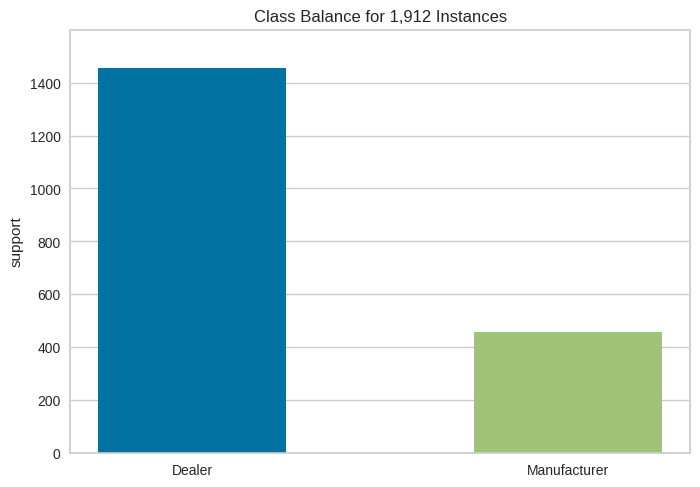

<Axes: title={'center': 'Class Balance for 1,912 Instances'}, ylabel='support'>

In [329]:
visualizer = ClassBalance(labels=["Dealer", "Manufacturer"])

visualizer.fit(y)        
visualizer.show()  

Clear class imbalance. Will be using SMOTE to resample data. 

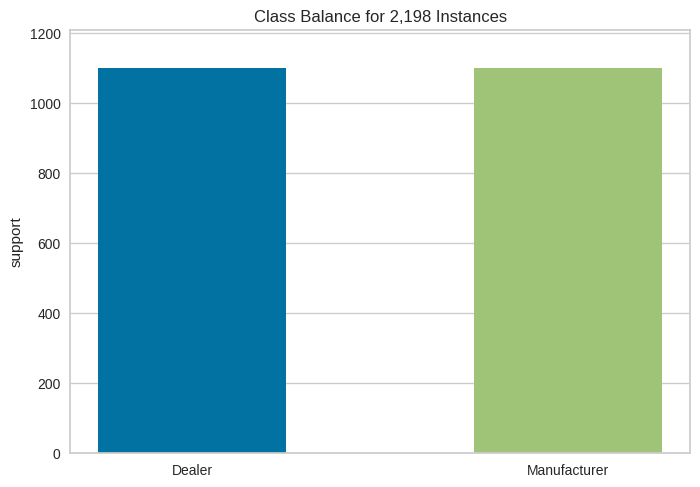

<Axes: title={'center': 'Class Balance for 2,198 Instances'}, ylabel='support'>

In [330]:
sm = SMOTE(random_state=17)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

visualizer = ClassBalance(labels=["Dealer", "Manufacturer"])
visualizer.fit(y_train_smote)    
visualizer.show()

## Model Training and Selection 

### Model 1. AdaBoost with SMOTE Resampled data

In [331]:
ada_boost_params = {'n_estimators': [50, 100, 200, 250, 300],
                    'learning_rate': [0.1, 0.5, 1.0]}


ada_boost_gs = GridSearchCV(AdaBoostClassifier(), ada_boost_params, scoring='accuracy', cv=10)
ada_boost_gs.fit(X_train_smote, y_train_smote)
ada_boost_gs.best_params_



{'learning_rate': 1.0, 'n_estimators': 300}

In [332]:
ada_boost_gs = AdaBoostClassifier(learning_rate = 1, n_estimators = 100)
ada_boost_gs.fit(X_train_smote, y_train_smote)

y_pred = ada_boost_gs.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=3, target_names=["Dealer", "Manufacturer"]))

              precision    recall  f1-score   support

      Dealer      0.763     0.572     0.654       355
Manufacturer      0.283     0.488     0.358       123

    accuracy                          0.550       478
   macro avg      0.523     0.530     0.506       478
weighted avg      0.640     0.550     0.578       478



We are trying models on our non resampled data as well as the resampled data and will go with whichever models perform best. 

### Model 2. KNN

In [333]:
knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}


#GridSearch
knn = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='recall', cv=5)
       
#Fitting the model
knn.fit(X_train, y_train)

# Choosing the best model
best_knn = knn.best_estimator_

# Testing the best model
knn_pred = best_knn.predict(X_test)
print("KNN classification report:")
print(classification_report(y_test, knn_pred, target_names=['Dealer', 'Manufacturer']))

KNN classification report:
              precision    recall  f1-score   support

      Dealer       0.74      0.84      0.78       355
Manufacturer       0.24      0.15      0.18       123

    accuracy                           0.66       478
   macro avg       0.49      0.49      0.48       478
weighted avg       0.61      0.66      0.63       478



### Model 3. Logistic Regression

In [334]:
logistic_params = {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                   'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}



#GridSearch
logistic = GridSearchCV(LogisticRegression(), logistic_params, scoring='f1', cv=5)
       
#Fitting the model
logistic.fit(X_train, y_train)

# Choosing the best model
best_logistic = logistic.best_estimator_

# Testing the best model
logistic_pred = best_logistic.predict(X_test)
print("Logistic Regression classification report:")
print(classification_report(y_test, logistic_pred, target_names=['Dealer', 'Manufacturer']))

Logistic Regression classification report:
              precision    recall  f1-score   support

      Dealer       0.74      1.00      0.85       355
Manufacturer       0.50      0.01      0.02       123

    accuracy                           0.74       478
   macro avg       0.62      0.50      0.43       478
weighted avg       0.68      0.74      0.64       478



### Model 4. Decision Trees

In [335]:
decision_tree_params = {'max_depth': [3, 5, 7],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4]}

#GridSearch
decision_tree = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, scoring='recall', cv=5)
       
#Fitting the model
decision_tree.fit(X_train, y_train)

# Choosing the best model
best_decision_tree = decision_tree.best_estimator_

# Testing the best model
decision_tree_pred = best_decision_tree.predict(X_test)
print("Decision Tree classification report:")
print(classification_report(y_test, decision_tree_pred, target_names=['Dealer', 'Manufacturer']))

Decision Tree classification report:
              precision    recall  f1-score   support

      Dealer       0.74      0.99      0.85       355
Manufacturer       0.29      0.02      0.03       123

    accuracy                           0.74       478
   macro avg       0.51      0.50      0.44       478
weighted avg       0.63      0.74      0.64       478



### Model 5. Ada Boost Classifier

In [336]:
# Defining parameter for the gridseach

ada_boost_params = {'n_estimators': [50, 100, 200],
                    'learning_rate': [0.1, 0.5, 1.0]}


#GridSearch
ada_boost = GridSearchCV(AdaBoostClassifier(), ada_boost_params, scoring='recall', cv=5)
       
#Fitting the model
ada_boost.fit(X_train, y_train)

# Choosing the best model
best_ada_boost = ada_boost.best_estimator_

# Testing the best model
ada_boost_pred = best_ada_boost.predict(X_test)
print("AdaBoost classification report:")
print(classification_report(y_test, ada_boost_pred, target_names=['Dealer', 'Manufacturer']))

AdaBoost classification report:
              precision    recall  f1-score   support

      Dealer       0.75      1.00      0.85       355
Manufacturer       0.67      0.02      0.03       123

    accuracy                           0.74       478
   macro avg       0.71      0.51      0.44       478
weighted avg       0.73      0.74      0.64       478



### Here, we see that by sampling the data, our model performs worse so we choose the model with the unsampled data. 

* We are selecting our final model as the AdaBoost as it performed the best with the highest minority class precision.

* Our recall value is very low because of the dataset as it does not have enough features to discern between have less False Negatives for the Manufacturers.

* We are prioritising Precision (True Positives) to investigate how inspection reports are reaffirming that the manufacturers are having the more violations than dealer.

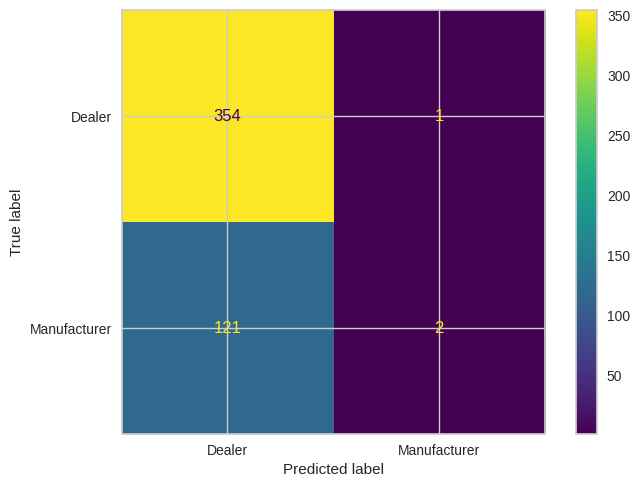

In [337]:
cm_AdaBoost = confusion_matrix(y_test,ada_boost_pred)
display_cm= ConfusionMatrixDisplay(confusion_matrix=cm_AdaBoost,
                                       display_labels=['Dealer', 'Manufacturer'])
display_cm.plot();

#### Feature importance graph to infer our result

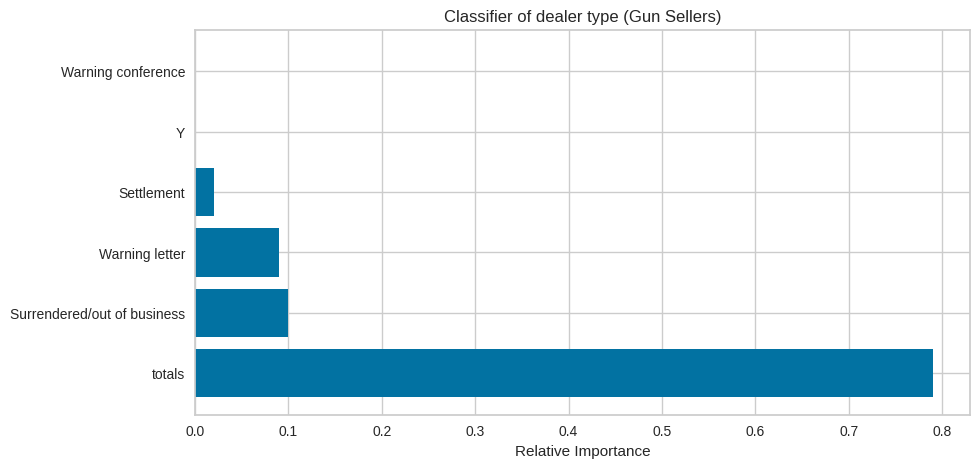

In [338]:
# Getting the feature importance and sorting it in descending order
importances = best_ada_boost.feature_importances_
indices = np.argsort(importances)[::-1]

#bar plot
plt.figure(figsize=(10, 5))
plt.title("Classifier of dealer type (Gun Sellers)")
plt.barh(range(len(indices)), importances[indices], align="center")
feature_names = list(X_train.columns)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Here we see that the feature totals (Total number of violations) is most impactful in the classfication for manufacturers, which conversely means that manufacturers do more violations

# Reference


*   AdaBoost - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Pie Chart - https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
*   ElasticNet - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
*   Recall vs Precision TradeOff - https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134
*   Statology, Drop Rows Contatining strings - https://www.statology.org/pandas-drop-rows-that-contain-string/
*   Scikit learn Min Max Scaler - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
*   Stackabuse - https://stackabuse.com/python-get-number-of-elements-in-a-list/, https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html 

*   Lab notebooks - 3,4,5,6,7
*   Lecture slides and Inclass assignment

